MODELOS DE REGRESION

Salario Esperado "vs" los Años de Estudio  

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

#Datos de ejemplo: años de Estudio y Salario Esperado
x = np.array([[3], [4], [5], [6], [7], [8], [9], [10]])  # Notar las listas anidadas
y = np.array([37000, 47000, 51000, 52000, 62000, 67000, 70000, 77000])


In [31]:
#Crear el Modelo de Regresion Lineal

model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [32]:
#Prediccion
y_pred = model.predict(x)

In [33]:
model.coef_

array([5392.85714286])

In [34]:
model.intercept_

22821.428571428558

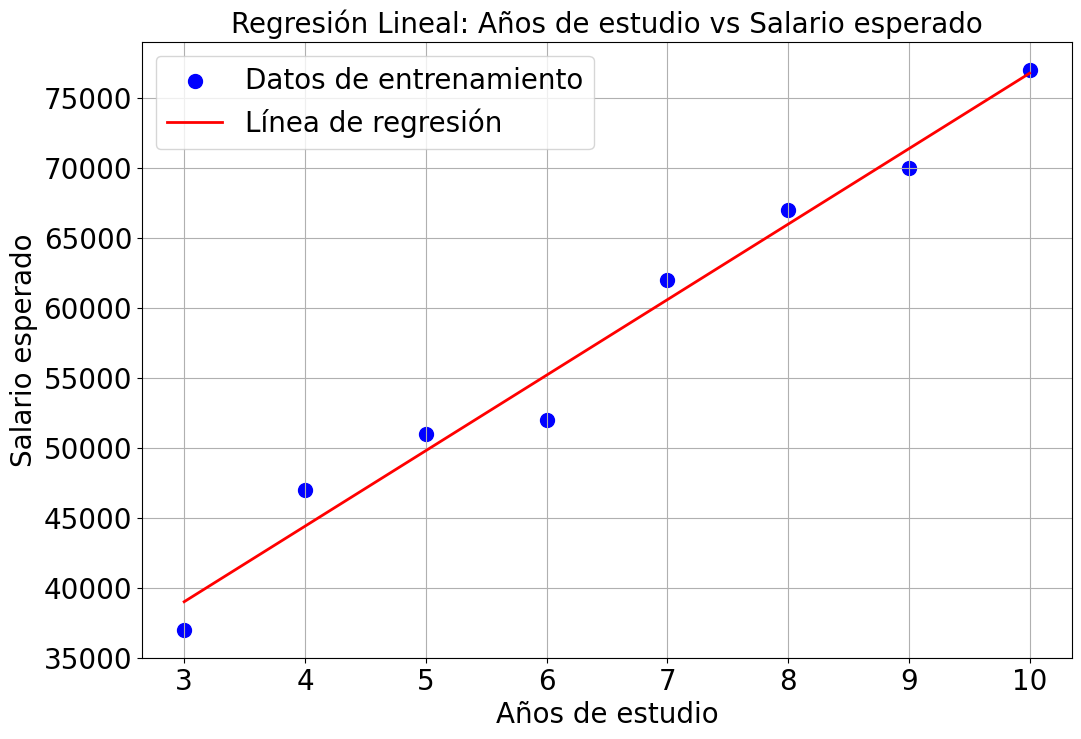

In [37]:
# Change the line to use the reshape function instead of the reshare function
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)

size = 20
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Datos de entrenamiento', s=100)  # s aumenta el tamaño de los puntos
plt.plot(x_line, y_line, color='red', label='Línea de regresión', linewidth=2)
plt.xlabel('Años de estudio', fontsize=size)
plt.ylabel('Salario esperado', fontsize=size)
plt.title('Regresión Lineal: Años de estudio vs Salario esperado', fontsize=size)
plt.legend(fontsize=size)
plt.grid(True)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.show()


Años de Experiencia


In [41]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Datos de ejemplo: años de estudio, años de experiencia, salario esperado
X = np.array([[3, 1], [3,10], [4, 3], [4,8], [5, 5], [5,1],[6, 7], [7, 9], [8, 11], [9, 13], [10, 15],  [10,1]])
y = np.array([37000, 70000, 47000, 60000, 51000, 42000,52000, 62000, 67000, 70000, 77000, 50000])

In [42]:
# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [44]:
# Predicción
y_pred = model.predict(X)

In [45]:
model.coef_

array([ 446.18357488, 2355.33011272])

In [46]:
model.intercept_

37844.55716586151

In [47]:
# Crear una malla para graficar el plano de regresión
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Crear la gráfica interactiva en 3D
fig = go.Figure()

# Agregar puntos de datos
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', name='Salario esperado', marker=dict(size=5, color='blue')))

# Agregar el plano de regresión
fig.add_trace(go.Surface(x=x_surf, y=y_surf, z=z_surf, name='Plano de regresión', colorscale='Viridis', opacity=0.6))

# Configurar el layout
fig.update_layout(scene=dict(
    xaxis_title='Años de estudio',
    yaxis_title='Años de experiencia',
    zaxis_title='Salario esperado'),
    title='Regresión Lineal 3D Interactiva',
    showlegend=True
)
fig.show()

ECUACION NORMAL

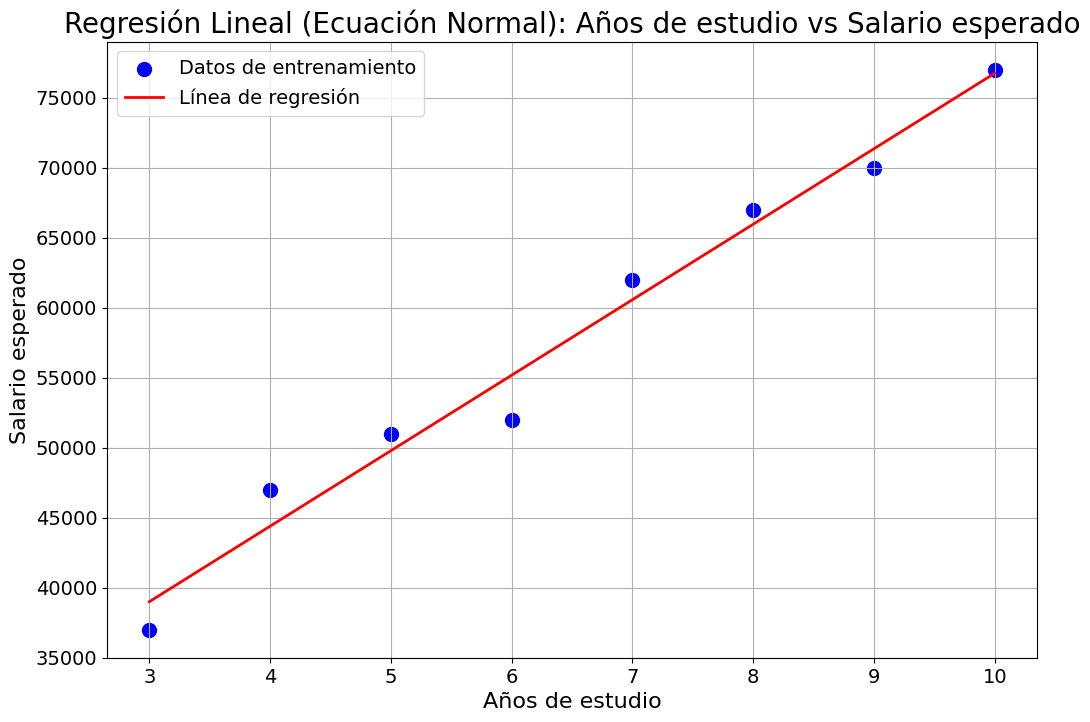

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: años de estudio y salario esperado
X = np.array([[3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([37000, 47000, 51000, 52000, 62000, 67000, 70000, 77000])

# Añadir una columna de 1s a X para el término de sesgo (intercepto)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b es X con una columna de 1s

# Calcular theta utilizando la ecuación normal
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predicciones
X_new = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]  # Añadir una columna de 1s para el término de sesgo  (@es multiplizacione de matrices)
y_predict = X_new_b @ theta_best

# Crear la gráfica en 2D
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Datos de entrenamiento', s=100)  # s aumenta el tamaño de los puntos
plt.plot(X_new, y_predict, color='red', label='Línea de regresión', linewidth=2)
plt.xlabel('Años de estudio', fontsize=16)
plt.ylabel('Salario esperado', fontsize=16)
plt.title('Regresión Lineal (Ecuación Normal): Años de estudio vs Salario esperado', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [50]:
theta_best

array([22821.42857143,  5392.85714286])

Descenso del Gradiante


In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: años de estudio y salario esperado
X = np.array([[3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([37000, 47000, 51000, 52000, 62000, 67000, 70000, 77000])

In [52]:
# Agregamos el término de sesgo (intercepto) a X
X_b = np.c_[np.ones((X.shape[0], 1)), X] # X_b es X con una columna de 1s
y = y.reshape(-1, 1)

In [53]:
# Parámetros de la regresión
np.random.seed(42)
eta = 0.01 # tasa de aprendizaje
n_epochs = 5000
m = len(X_b) # número de instancias
np.random.seed(42)
theta = np.random.randn(2, 1) # inicializar los parámetros de manera aleatoria

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [54]:
theta

array([[22821.0125216 ],
       [ 5392.91420632]])

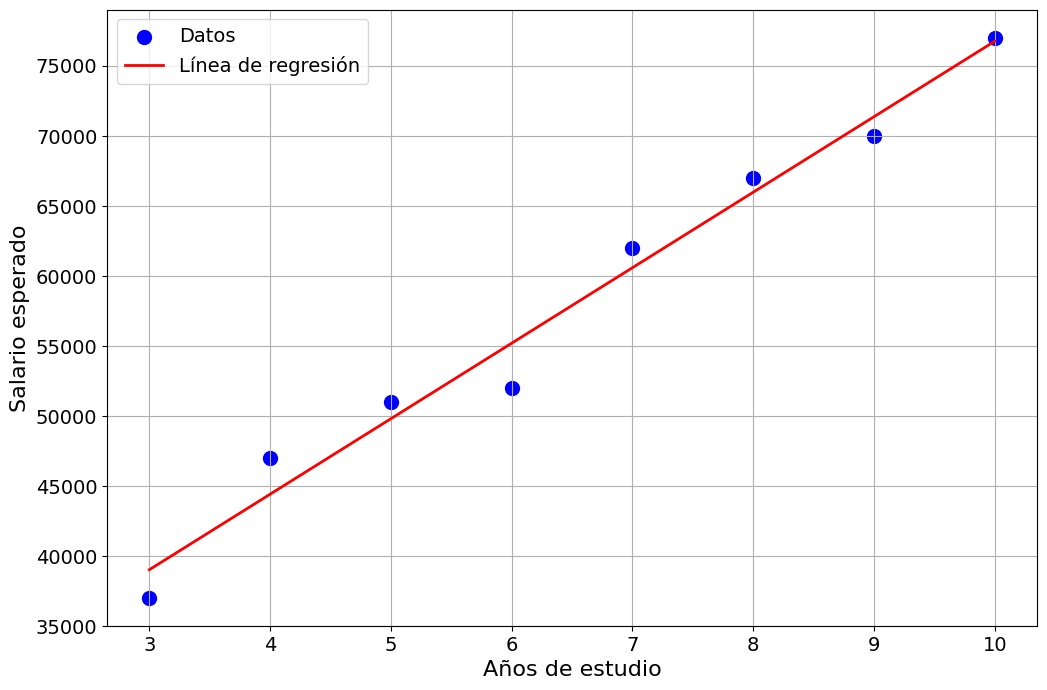

In [55]:
# Visualización de los datos y la línea de regresión
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Datos',s=100)
plt.plot(X, X_b.dot(theta), color='red', label='Línea de regresión', linewidth=2)
plt.xlabel("Años de estudio", fontsize=16)
plt.ylabel("Salario esperado", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<ipython-input-56-f7b449ec5ff7>:14: RuntimeWarning:

overflow encountered in matmul

<ipython-input-56-f7b449ec5ff7>:15: RuntimeWarning:

invalid value encountered in subtract



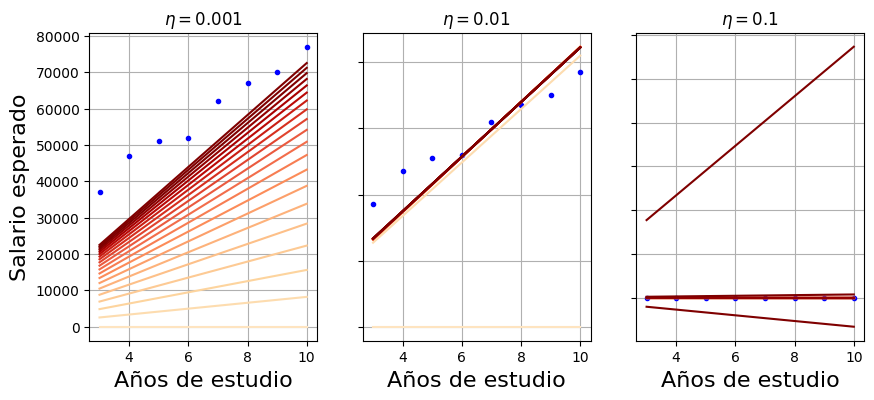

In [56]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 5000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("Años de estudio", fontsize=16)
    # plt.ylabel("Salario esperado", fontsize=16)
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialización aleatoria

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.001)
plt.ylabel("Salario esperado", rotation=90, fontsize=16)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.01)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.1)
plt.show()

Descenso de Gradiante Estocastico



In [57]:
import numpy as np

# Datos de ejemplo: años de estudio y salario esperado
X = np.array([[3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([37000, 47000, 51000, 52000, 62000, 67000, 70000, 77000])

# Agregamos el término de sesgo (intercepto) a X
X_b = np.c_[np.ones((X.shape[0], 1)), X] # X_b es X con una columna de 1s
y = y.reshape(-1, 1)

In [58]:
# Inicializar parámetros de la regresión
theta = np.random.randn(2, 1)  # Inicializamos theta al azar

# Hiperparámetros del algoritmo de descenso de gradiente estocástico
learning_rate = 0.01  # Tasa de aprendizaje
n_epochs = 50  # Número de épocas
m = len(X_b)  # Número de ejemplos

# Implementación del descenso de gradiente estocástico
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

In [59]:
theta

array([[13743.95732318],
       [ 5836.91628025]])

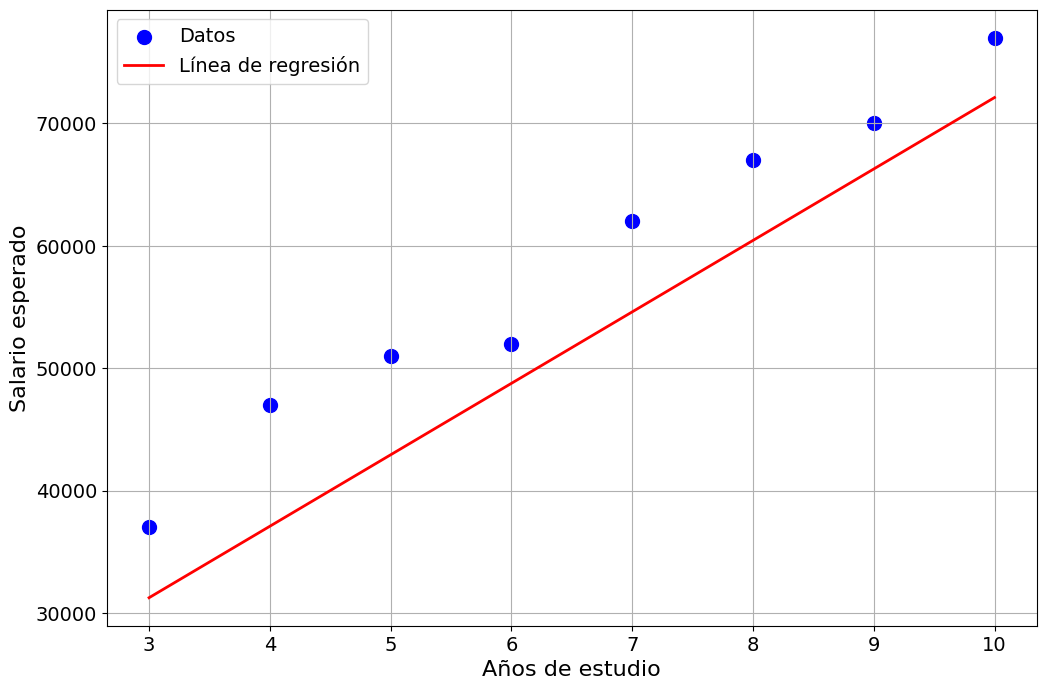

In [60]:
# Visualización de los datos y la línea de regresión
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Datos',s=100)
plt.plot(X, X_b.dot(theta), color='red', label='Línea de regresión', linewidth=2)
plt.xlabel("Años de estudio", fontsize=16)
plt.ylabel("Salario esperado", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Descenso de Gradiante estocastico - Actualizacion tasa de Aprendizaje

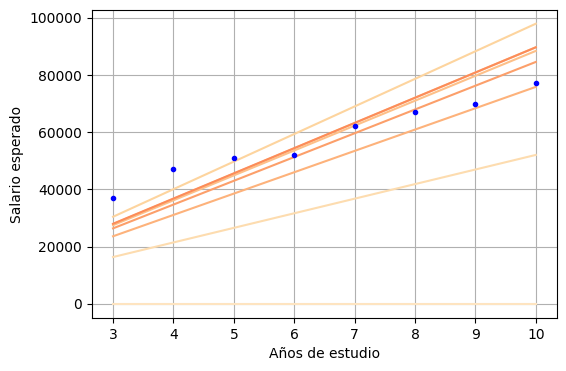

In [61]:
n_epochs = 50
t0, t1 = 0.1, 10

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

theta_path_sgd = []

n_shown = 20
plt.figure(figsize=(6, 4))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("Años de estudio")
plt.ylabel("Salario esperado", rotation=90)
plt.grid()
plt.show()

In [62]:
theta

array([[2834.64313684],
       [8038.10300551]])

In [63]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,
                      eta0=0.01,
                      n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [64]:
sgd_reg.intercept_, sgd_reg.coef_

(array([16657.4014772]), array([6218.94995637]))

Descenso de Gradiante por Minilotes


In [65]:
from math import ceil

n_epochs = 50
minibatch_size = 2
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicilización aleatoria

t0, t1 = 0.1, 10

theta_path_mgd = []

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [66]:
theta

array([[8607.79901662],
       [7645.74389734]])

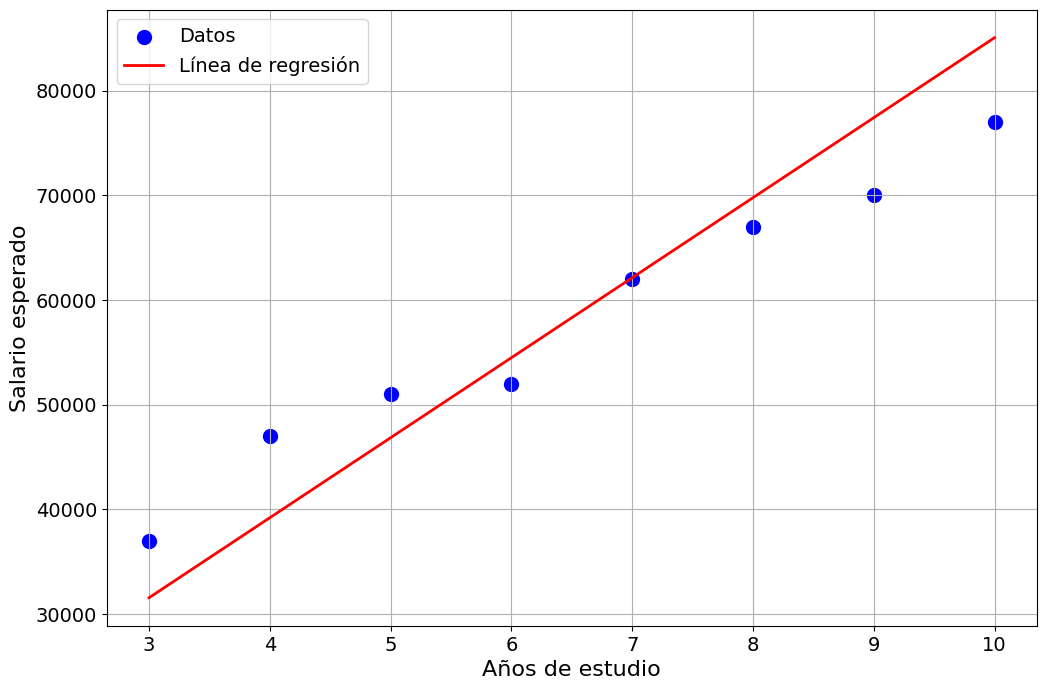

In [67]:
# Visualización de los datos y la línea de regresión
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Datos',s=100)
plt.plot(X, X_b.dot(theta), color='red', label='Línea de regresión', linewidth=2)
plt.xlabel("Años de estudio", fontsize=16)
plt.ylabel("Salario esperado", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

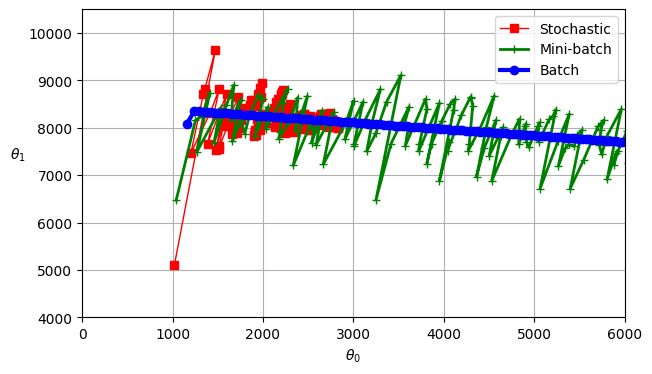

In [68]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper right")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([0, 6000, 4000, 10500])
plt.grid()
plt.show()